<a href="https://colab.research.google.com/github/saadatialirezam-create/bioinformatics-project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import os
import glob
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Check if TF is running on GPU

In [3]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Connect drive to colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Dataset

In [3]:
dataset_path = os.listdir('/content/drive/MyDrive/Dataset/Training')
print (dataset_path)  #what kinds of classes are in this dataset
print("Types of classes labels found: ", len(dataset_path))

['notumor', 'pituitary', 'glioma', 'meningioma']
Types of classes labels found:  4


## Build Dataframe

In [4]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('/content/drive/MyDrive/Dataset/Training' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

# Build a dataframe
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

    Labels                                image
0  notumor  dataset_path/notumor/Tr-no_0363.jpg
1  notumor  dataset_path/notumor/Tr-no_0529.jpg
2  notumor  dataset_path/notumor/Tr-no_0514.jpg
3  notumor  dataset_path/notumor/Tr-no_0556.jpg
4  notumor  dataset_path/notumor/Tr-no_0576.jpg
          Labels                                   image
5707  meningioma  dataset_path/meningioma/Tr-me_0115.jpg
5708  meningioma  dataset_path/meningioma/Tr-me_0493.jpg
5709  meningioma  dataset_path/meningioma/Tr-me_0140.jpg
5710  meningioma  dataset_path/meningioma/Tr-me_0213.jpg
5711  meningioma  dataset_path/meningioma/Tr-me_0228.jpg


## Check how many samples for each category are present

In [5]:
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  5712
Labels
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: count, dtype: int64


## List all categories

In [ ]:
path_to_notumor = '/content/drive/MyDrive/Dataset/Training/notumor/*.jpg'
path_to_pituitary = '/content/drive/MyDrive/Dataset/Training/pituitary/*.jpg'
path_to_meningioma = '/content/drive/MyDrive/Dataset/Training/meningioma/*.jpg'
path_to_glioma = '/content/drive/MyDrive/Dataset/Training/glioma/*.jpg'

imgs_in_notumor = glob.glob(path_to_notumor)
notumor_imgs = []
for img in imgs_in_notumor:
    notumor_imgs.append(cv.imread(img))

imgs_in_pituitary = glob.glob(path_to_pituitary)
pituitary_imgs = []
for img in imgs_in_pituitary:
    pituitary_imgs.append(cv.imread(img))

imgs_in_meningioma = glob.glob(path_to_meningioma)
meningioma_imgs = []
for img in imgs_in_meningioma:
    meningioma_imgs.append(cv.imread(img))

imgs_in_glioma = glob.glob(path_to_glioma)
glioma_imgs = []
for img in imgs_in_glioma:
    glioma_imgs.append(cv.imread(img))

In [ ]:
print(len(notumor_imgs), len(pituitary_imgs), len(meningioma_imgs), len(glioma_imgs))

1595 1457 1339 1321


## Show some of the Data

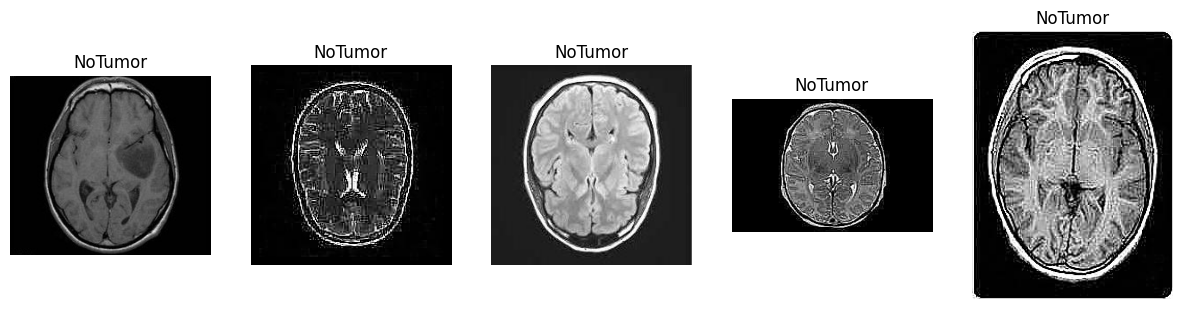

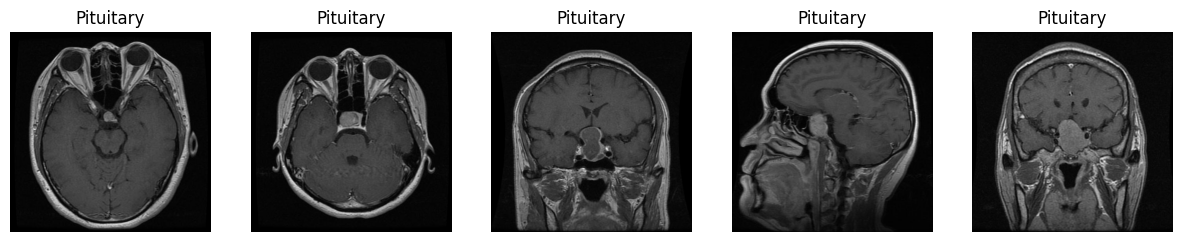

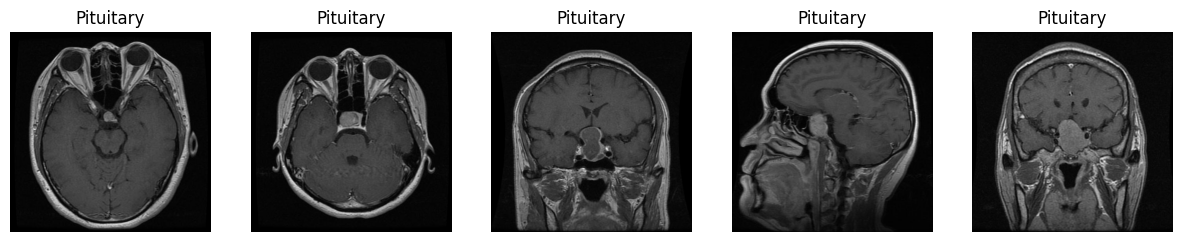

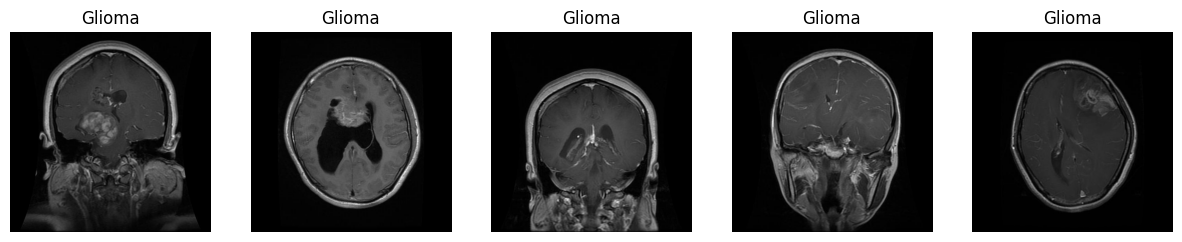

In [ ]:
num_show = 5
plt.figure(figsize=(15, 5))
for i in range(num_show):
    img = notumor_imgs[i]
    plt.subplot(1, num_show, i+1)
    plt.imshow(img)
    plt.title("NoTumor")
    plt.axis('off')

plt.figure(figsize=(15, 5))
for i in range(num_show):
    img = pituitary_imgs[i]
    plt.subplot(1, num_show, i+1)
    plt.imshow(img)
    plt.title("Pituitary")
    plt.axis('off')

plt.figure(figsize=(15, 5))
for i in range(num_show):
    img = pituitary_imgs[i]
    plt.subplot(1, num_show, i+1)
    plt.imshow(img)
    plt.title("Pituitary")
    plt.axis('off')

plt.figure(figsize=(15, 5))
for i in range(num_show):
    img = glioma_imgs[i]
    plt.subplot(1, num_show, i+1)
    plt.imshow(img)
    plt.title("Glioma")
    plt.axis('off')
plt.show()


## Dump the list of images into Drive

In [ ]:
import pickle

data = {
    'notumor': notumor_imgs,
    'pituitary': pituitary_imgs,
    'meningioma': meningioma_imgs,
    'glioma': glioma_imgs
}

with open('/content/drive/MyDrive/brain_tumor_lists.pkl', 'wb') as f:
    pickle.dump(data, f)

## Once I uploaded all images to Drive, I load the images from there so I don't have to wait 17 min for loading the data from scratch:

In [6]:
import pickle
with open('/content/drive/MyDrive/brain_tumor_lists.pkl', 'rb') as f:
    data = pickle.load(f)

notumor_imgs = data['notumor']
pituitary_imgs = data['pituitary']
meningioma_imgs = data['meningioma']
glioma_imgs = data['glioma']

In [7]:
total_imgs = []
for imgs in notumor_imgs:
    total_imgs.append(cv.resize(imgs, (224, 224)))
del notumor_imgs
for imgs in glioma_imgs:
    total_imgs.append(cv.resize(imgs, (224, 224)))
del glioma_imgs
for imgs in meningioma_imgs:
    total_imgs.append(cv.resize(imgs, (224, 224)))
del meningioma_imgs
for imgs in pituitary_imgs:
    total_imgs.append(cv.resize(imgs, (224, 224)))
del pituitary_imgs

In [8]:
total_imgs = np.array(total_imgs)

total_imgs.shape

(5712, 224, 224, 3)

In [9]:
from sklearn.preprocessing import LabelEncoder

y = df["Labels"].values
le = LabelEncoder()
y = le.fit_transform(y).astype("int32")   # 0..3

print("classes:", le.classes_)
print("min/max y:", y.min(), y.max())
print("images:", total_imgs.shape, total_imgs.dtype)
print("labels:", y.shape, y.dtype)

classes: ['glioma' 'meningioma' 'notumor' 'pituitary']
min/max y: 0 3
images: (5712, 224, 224, 3) uint8
labels: (5712,) int32


In [10]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

total_imgs, y = shuffle(total_imgs, y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(
    total_imgs, y,
    test_size=0.05,
    random_state=415,
    stratify=y
)

print("train_x:", train_x.shape, train_x.dtype)
print("train_y:", train_y.shape, train_y.dtype)
print("test_x:", test_x.shape, test_x.dtype)
print("test_y:", test_y.shape, test_y.dtype)

train_x: (5426, 224, 224, 3) uint8
train_y: (5426,) int32
test_x: (286, 224, 224, 3) uint8
test_y: (286,) int32


In [11]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 4
IMG_SIZE = 224

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",   # ✅ چون train_y عددی است
    metrics=["accuracy"]
)

model.summary()

hist = model.fit(
    train_x, train_y,
    validation_data=(test_x, test_y),
    epochs=30,
    batch_size=32,
    verbose=2
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 4)              │     4,054,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

Epoch 1/30
170/170 - 169s - 996ms/step - accuracy: 0.5682 - loss: 1.2904 - val_accuracy: 0.2552 - val_loss: 1.9319
Epoch 2/30
170/170 - 19s - 114ms/step - accuracy: 0.7226 - loss: 0.7043 - val_accuracy: 0.2797 - val_loss: 1.9807
Epoch 3/30
170/170 - 19s - 113ms/step - accuracy: 0.7814 - loss: 0.5996 - val_accuracy: 0.2343 - val_loss: 2.0209
Epoch 4/30
170/170 - 20s - 116ms/step - accuracy: 0.8308 - loss: 0.4369 - val_accuracy: 0.4301 - val_loss: 3.4196
Epoch 5/30
170/170 - 20s - 117ms/step - accuracy: 0.8835 - loss: 0.3190 - val_accuracy: 0.7483 - val_loss: 0.7631
Epoch 6/30
170/170 - 20s - 117ms/step - accuracy: 0.8940 - loss: 0.3051 - val_accuracy: 0.6364 - val_loss: 1.5749
Epoch 7/30
170/170 - 20s - 115ms/step - accuracy: 0.8513 - loss: 0.4222 - val_accuracy: 0.7867 - val_loss: 0.5585
Epoch 8/30
170/170 - 20s - 116ms/step - accuracy: 0.8911 - loss: 0.3002 - val_accuracy: 0.7238 - val_loss: 0.7734
Epoch 9/30
170/170 - 20s - 116ms/step - accuracy: 0.9121 - loss: 0.2952 - val_accuracy:

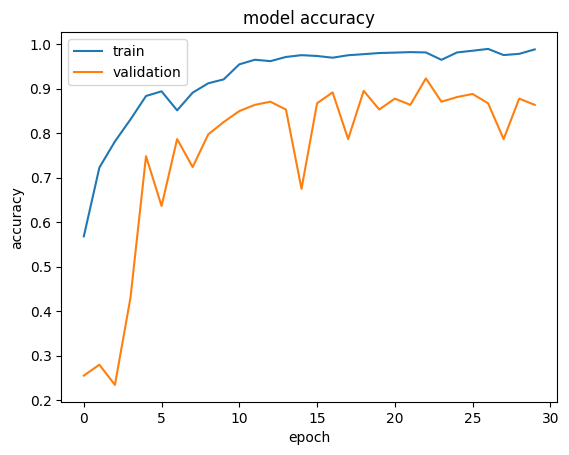

In [13]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_hist(hist)

In [14]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8873 - loss: 0.4324
Loss = 0.5521054863929749
Test Accuracy = 0.8636363744735718


In [17]:
idx = 5
img = test_x[idx]
true_id = test_y[idx]

x = np.expand_dims(img, axis=0)

preds = model.predict(x, verbose=0)[0]
pred_id = np.argmax(preds)

print("True:", le.inverse_transform([true_id])[0], true_id)
print("Pred:", le.inverse_transform([pred_id])[0], pred_id)
print("Probabilities:", preds)

True: pituitary 3
Pred: pituitary 3
Probabilities: [1.00377665e-05 4.41356640e-08 2.51090285e-07 9.99989748e-01]
